In [1]:
from bookstore.client.notebook import CurrentNotebookClient
import nbformat

In [2]:
def set_metadata(metadata, nb_name = None):
    if nb_name is None:
        nb_client = CurrentNotebookClient()
        nb_name = nb_client.session.path
    nb = nbformat.read(nb_name, as_version=4)
    nb.metadata.update(metadata)
    nbformat.write(nb, nb_name)
    
def set_title(title=""):
    set_metadata({'title': title})

In [4]:
set_title("This notebook creates a magic to set the current metadata title")

In [22]:
from IPython.core.magic import register_line_magic

@register_line_magic
def title(title=""):
    set_metadata({'title': title})
    
del title # need to delete it to avoid namespace issues in line magics

In [ ]:
%title "Magically set the title"

# Example result

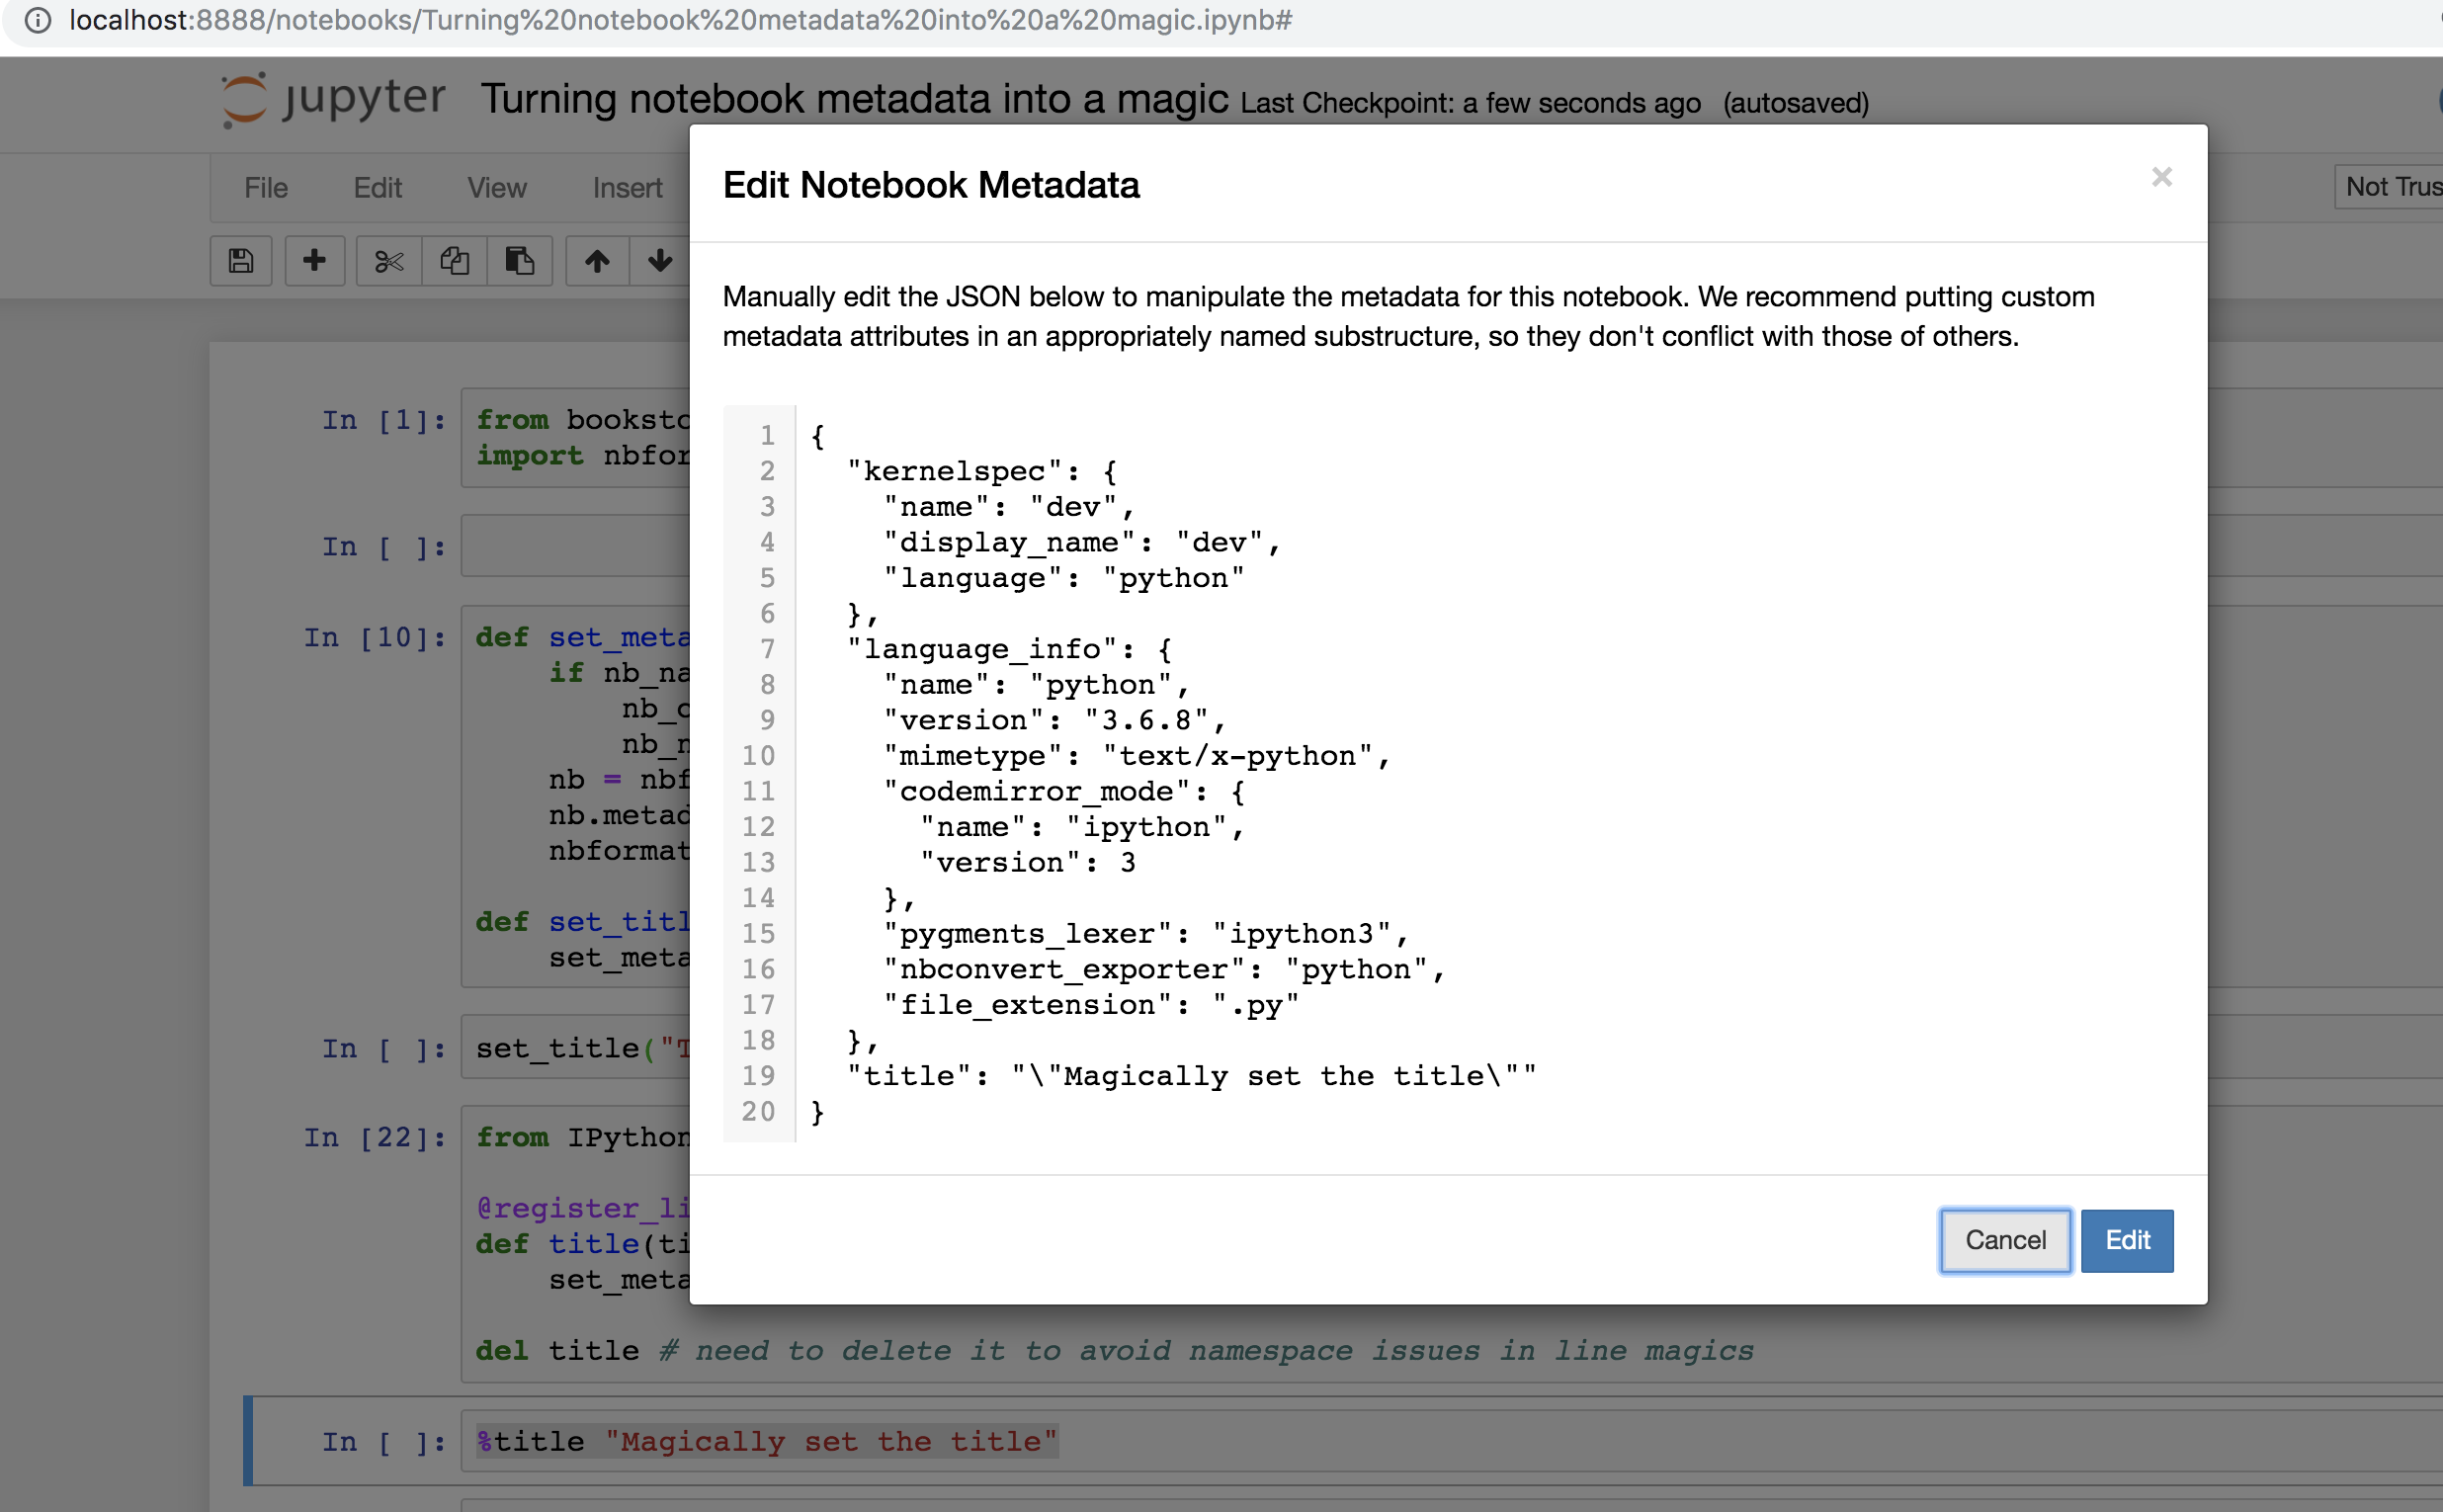

In [11]:
from IPython.core.magic import (Magics, magics_class, line_magic,
                                cell_magic, line_cell_magic)

@magics_class
class MetadataMagics(Magics):

    @line_magic
    def title(self, line):
        "title magic"
        title = line
        set_metadata({'title': title})
        return f"Title now *{line}*, refresh page to avoid overwriting."
    
get_ipython().register_magics(MetadataMagics)

In [12]:
%title Magically set the title

'set title to Magically set the title, refresh page to avoid overwriting.'

# Example set through Magics class

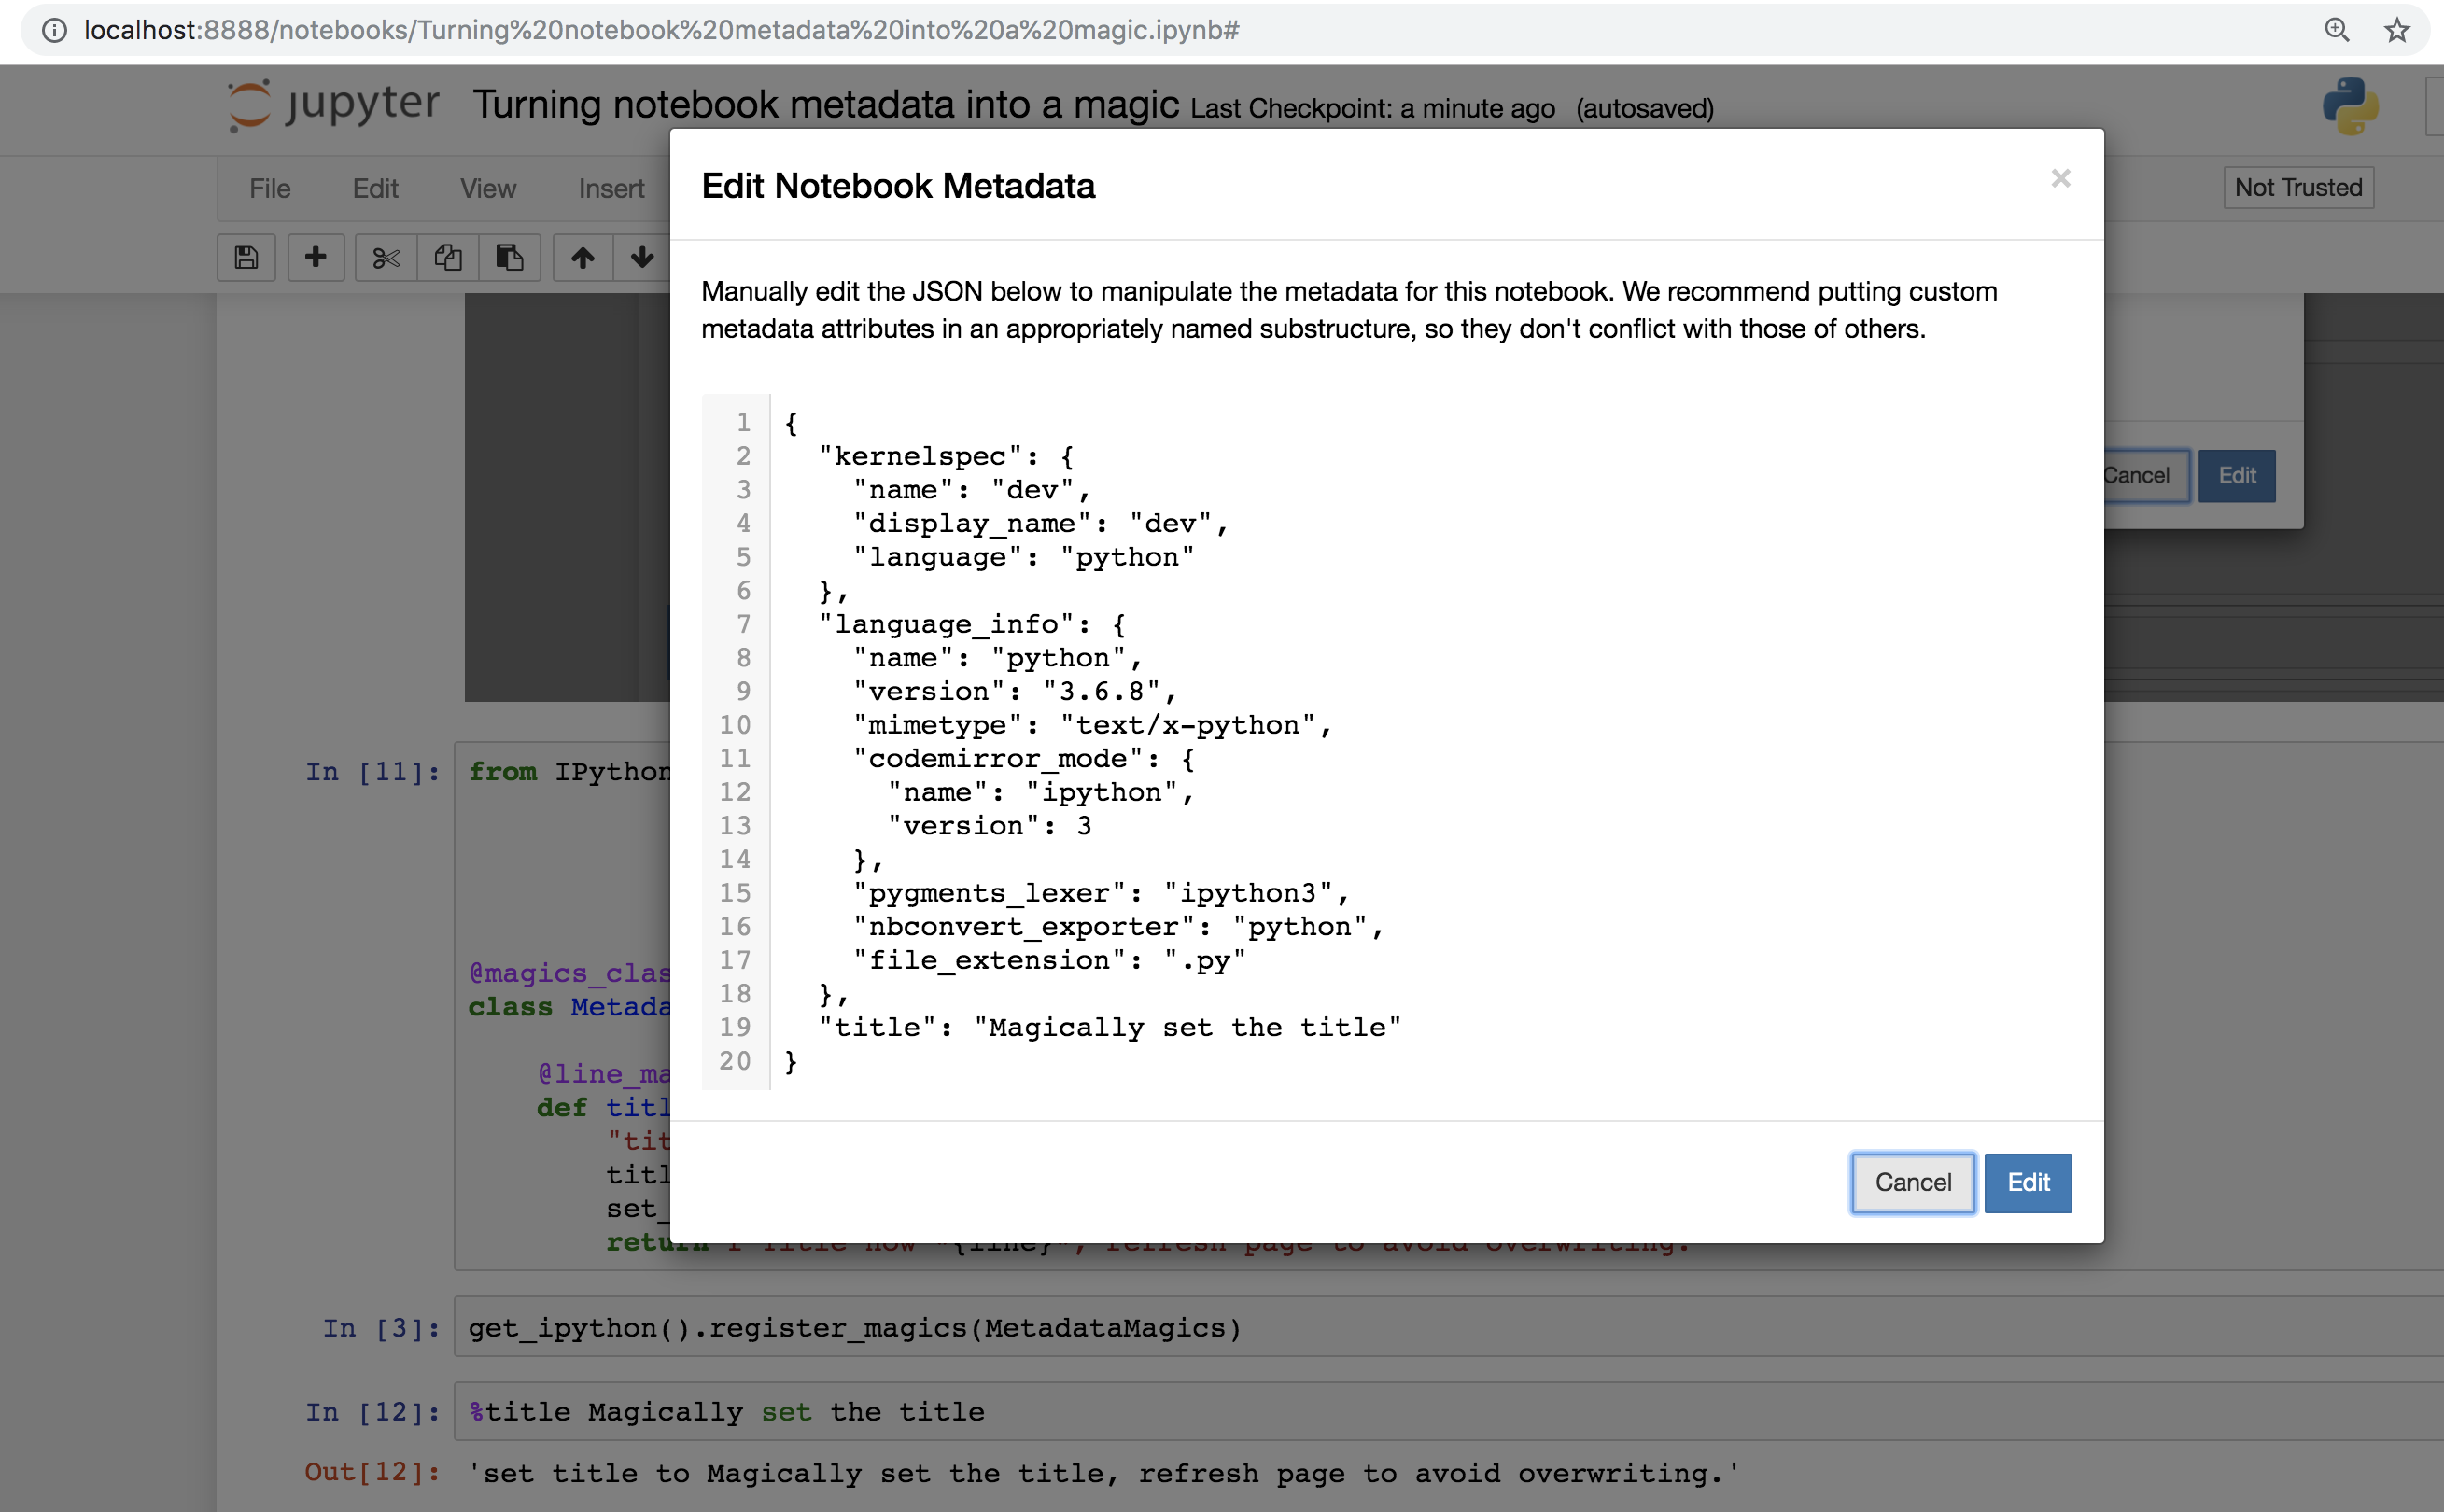